# Campervan Projekt

## Libraries and settings

In [485]:
# Libraries
import os
import re
import sqlite3
import fnmatch
import pprint
import requests
import numpy as np
import pandas as pd

import seaborn as sns
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

import json
import urllib
import folium
import platform

import geopandas as gpd
from IPython.display import clear_output

from shapely.geometry import Polygon

import matplotlib.patches as patches
from matplotlib import pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False


print(os.getcwd())

/workspaces/project_Autoscout_Coding_Pros/Project_Campers


## Import data

In [486]:
# Read data
df_orig = pd.read_csv("./data/Autoscout24_Camper.csv", sep=",", encoding='utf-8')

# Show column names from df_orig
print(df_orig.columns)

# define the columns to keep
colums = ['web-scraper-order',
        'description_raw',
        'price_raw', 
        'mileage_raw',
       'fuel_type_raw', 
       'location_raw']

# keep only the columns we are interested in
df = df_orig[colums]

# Show first records of data frame
df.head()


Index(['web-scraper-order', 'web-scraper-start-url', 'autoscout24',
       'autoscout24-href', 'description_raw', 'price_raw', 'mileage_raw',
       'fuel_type_raw', 'location_raw'],
      dtype='object')


web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ Camper   
1      1733470799-2      CARADO I 449 Édition 15 Fiat Capron 169L/1449   
2      1733470801-3                              DETHLEFFS Fiat Ducato   
3      1733470805-4                         FIAT Euro Master Wohnmobil   
4      1733470807-5  VW T6.1 California 2.0 TDI Ocean Edition Liber...   

      price_raw mileage_raw fuel_type_raw  \
0  CHF 15'900.–  265'000 km        Diesel   
1  CHF 71'900.–   14'000 km        Diesel   
2  CHF 37'800.–   90'000 km        Diesel   
3  CHF 19'900.–  187'236 km        Diesel   
4  CHF 84'500.–   16'500 km        Diesel   

                                        location_raw  
0                 Mittelstrasse 38, 3613 Steffisburg  
1  Zone industrielle Les Portettes 2c, 1312 Eclépens  
2                 Rte du St-Bernard 8, 1937 Orsières  
3                  Badenerstrasse 84, 8952 Schlieren  
4                                     8852 Altendorf

### Count number of rows and columns in the dateframe

In [487]:
# Dimension (rows, columns)
print('Dimension:', df.shape)

# Number of rows
print('Number of rows:', df.shape[0])

# Number of columns
print('Number of columns:', df.shape[1])

Dimension: (1587, 6)
Number of rows: 1587
Number of columns: 6


### Get Data types from Web scraping

In [488]:
# Get data types (note that in pandas, a string is referred to as 'object')
df.dtypes

web-scraper-order    object
description_raw      object
price_raw            object
mileage_raw          object
fuel_type_raw        object
location_raw         object
dtype: object

## Extract and save relevant information from raw data using regular expressions (regex)

### Extract Price

In [489]:
# Extract values from 'price_raw' column
price = []
for i in df['price_raw']:
    d1 = re.findall(r'[0-9]+', str(i))
    try:
        d2 = ''.join(d1).replace("'", "").replace("CHF", "").replace(".-", "").strip()
    except:
        d2 = None
    price.append(d2)

# Save as new variable in the pandas data frame
df['price'] = pd.Series(price, dtype="int")
    
# Print first 5 values
print(df[['price_raw', 'price']].head(5))

      price_raw  price
0  CHF 15'900.–  15900
1  CHF 71'900.–  71900
2  CHF 37'800.–  37800
3  CHF 19'900.–  19900
4  CHF 84'500.–  84500


In [490]:
df.head()

web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ Camper   
1      1733470799-2      CARADO I 449 Édition 15 Fiat Capron 169L/1449   
2      1733470801-3                              DETHLEFFS Fiat Ducato   
3      1733470805-4                         FIAT Euro Master Wohnmobil   
4      1733470807-5  VW T6.1 California 2.0 TDI Ocean Edition Liber...   

      price_raw mileage_raw fuel_type_raw  \
0  CHF 15'900.–  265'000 km        Diesel   
1  CHF 71'900.–   14'000 km        Diesel   
2  CHF 37'800.–   90'000 km        Diesel   
3  CHF 19'900.–  187'236 km        Diesel   
4  CHF 84'500.–   16'500 km        Diesel   

                                        location_raw  price  
0                 Mittelstrasse 38, 3613 Steffisburg  15900  
1  Zone industrielle Les Portettes 2c, 1312 Eclépens  71900  
2                 Rte du St-Bernard 8, 1937 Orsières  37800  
3                  Badenerstrasse 84, 8952 Schlieren  19900  
4                                     8852 Altendorf  84500

### Extract Mileage

In [491]:
# Extract values from 'mileage_raw' column
mileage = []
for i in df['mileage_raw']:
    d1 = re.findall(r'[0-9]+', str(i))
    try:
        d2 = ''.join(d1).replace("'", "").replace("km", "").replace(".-", "").strip()
    except:
        d2 = None
    mileage.append(d2)

# Save as new variable in the pandas data frame
df['mileage'] = pd.Series(mileage, dtype="int")
    
# Print first 5 values
print(df[['mileage_raw','mileage']].head(5))

  mileage_raw  mileage
0  265'000 km   265000
1   14'000 km    14000
2   90'000 km    90000
3  187'236 km   187236
4   16'500 km    16500


In [492]:
df.dtypes

web-scraper-order    object
description_raw      object
price_raw            object
mileage_raw          object
fuel_type_raw        object
location_raw         object
price                 int64
mileage               int64
dtype: object

### Fuel Type without Outliers

In [493]:
#count frequency of values in column 'fuel_type_raw'
df['fuel_type_raw'].value_counts()

fuel_type_raw
Diesel     1453
Benzin       72
-            61
Elektro       1
Name: count, dtype: int64

In [494]:
# Filter für Diesel und Benzin
df = df[(df['fuel_type_raw'] == 'Diesel') | (df['fuel_type_raw'] == 'Benzin')]

count = df['fuel_type_raw'].value_counts()
print(count)

fuel_type_raw
Diesel    1453
Benzin      72
Name: count, dtype: int64


### Fuel type to Dummy

In [495]:
# One-Hot-Encoding für die Spalte 'fuel_type_raw'
df_encoded = pd.get_dummies(df['fuel_type_raw'], prefix='fuel_type', drop_first=True)

# Konvertiere boolesche Werte in 0 und 1 (falls vorhanden)
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# Füge nur die neuen One-Hot-encoded Spalten dem ursprünglichen DataFrame hinzu
df = df.join(df_encoded)

# Überprüfe das Ergebnis
df.head()

web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ Camper   
1      1733470799-2      CARADO I 449 Édition 15 Fiat Capron 169L/1449   
2      1733470801-3                              DETHLEFFS Fiat Ducato   
3      1733470805-4                         FIAT Euro Master Wohnmobil   
4      1733470807-5  VW T6.1 California 2.0 TDI Ocean Edition Liber...   

      price_raw mileage_raw fuel_type_raw  \
0  CHF 15'900.–  265'000 km        Diesel   
1  CHF 71'900.–   14'000 km        Diesel   
2  CHF 37'800.–   90'000 km        Diesel   
3  CHF 19'900.–  187'236 km        Diesel   
4  CHF 84'500.–   16'500 km        Diesel   

                                        location_raw  price  mileage  \
0                 Mittelstrasse 38, 3613 Steffisburg  15900   265000   
1  Zone industrielle Les Portettes 2c, 1312 Eclépens  71900    14000   
2                 Rte du St-Bernard 8, 1937 Orsières  37800    90000   
3                  Badenerstrasse 84, 8952 Schlieren  19900   187236   
4                                     8852 Altendorf  84500    16500   

   fuel_type_Diesel  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

## Add Variables

### Price Cat

In [496]:
# Define classes (labels)
labels = ['0 - 19999', '20000 - 49999', '50000 - 99999', '100000 - 199999', '200000 - 499999']

# Use the .cut method from pandas to divide the numeric values in classes
df['price_cat'] = pd.cut(df['price'], bins=[0, 20000, 50000, 100000, 200000, 500000], labels=labels)

# Show original data and classes
print(df[['price', 'price_cat']])

# Count the frequency of each class and sort them
df['price_cat'].value_counts().sort_index()


      price      price_cat
0     15900      0 - 19999
1     71900  50000 - 99999
2     37800  20000 - 49999
3     19900      0 - 19999
4     84500  50000 - 99999
...     ...            ...
1582  52900  50000 - 99999
1583  56900  50000 - 99999
1584  32777  20000 - 49999
1585  31777  20000 - 49999
1586  39777  20000 - 49999

[1525 rows x 2 columns]


price_cat
0 - 19999          143
20000 - 49999      553
50000 - 99999      766
100000 - 199999     42
200000 - 499999     21
Name: count, dtype: int64

### Mileage Cat

In [497]:
# Define classes (labels)
labels = ['low', 'low-mid', 'mid', 'mid-high', 'high']
# labels = ['10000 - 49999', '50000 - 99999', '100000 - 199999', '200000 - 399999', '400000 - 499999', '500000 - 999999']
# Use the .cut method from pandas to divide the numeric values in classes
df['mileage_cat'] = pd.cut(df['mileage'], bins=[0, 50000, 100000, 200000, 400000, 500000], labels=labels)

# Show original data and classes
print(df[['mileage', 'mileage_cat']])

# Count the frequency of each class and sort them
df['mileage_cat'].value_counts().sort_index()

      mileage mileage_cat
0      265000    mid-high
1       14000         low
2       90000     low-mid
3      187236         mid
4       16500         low
...       ...         ...
1582    11000         low
1583    14500         low
1584   132000         mid
1585   116700         mid
1586    75098     low-mid

[1525 rows x 2 columns]


mileage_cat
low         735
low-mid     407
mid         299
mid-high     83
high          1
Name: count, dtype: int64

In [498]:
df.head()

web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ Camper   
1      1733470799-2      CARADO I 449 Édition 15 Fiat Capron 169L/1449   
2      1733470801-3                              DETHLEFFS Fiat Ducato   
3      1733470805-4                         FIAT Euro Master Wohnmobil   
4      1733470807-5  VW T6.1 California 2.0 TDI Ocean Edition Liber...   

      price_raw mileage_raw fuel_type_raw  \
0  CHF 15'900.–  265'000 km        Diesel   
1  CHF 71'900.–   14'000 km        Diesel   
2  CHF 37'800.–   90'000 km        Diesel   
3  CHF 19'900.–  187'236 km        Diesel   
4  CHF 84'500.–   16'500 km        Diesel   

                                        location_raw  price  mileage  \
0                 Mittelstrasse 38, 3613 Steffisburg  15900   265000   
1  Zone industrielle Les Portettes 2c, 1312 Eclépens  71900    14000   
2                 Rte du St-Bernard 8, 1937 Orsières  37800    90000   
3                  Badenerstrasse 84, 8952 Schlieren  19900   187236   
4                                     8852 Altendorf  84500    16500   

   fuel_type_Diesel      price_cat mileage_cat  
0                 1      0 - 19999    mid-high  
1                 1  50000 - 99999         low  
2                 1  20000 - 49999     low-mid  
3                 1      0 - 19999         mid  
4                 1  50000 - 99999         low

In [499]:
print(df.columns)

Index(['web-scraper-order', 'description_raw', 'price_raw', 'mileage_raw',
       'fuel_type_raw', 'location_raw', 'price', 'mileage', 'fuel_type_Diesel',
       'price_cat', 'mileage_cat'],
      dtype='object')


## Geocoding

### Adresses to Lat/Lon

In [500]:
# Define base url
base_url= "https://api3.geo.admin.ch/rest/services/api/SearchServer?"

# Geocode list of adresses
geolocation = []
n = 1
for i in df['location_raw'].astype(str):
    
    print('Geocoding address', 
          n, 
          'out of', 
          len(df['location_raw']), 
          ':', 
          i)
    n=n+1
    clear_output(wait=True)
    
    try:
        # Set up search parameters - address, origins and type
        parameters = {"searchText": i,
                      "origins": "address",
                      "type": "locations",
                     }

        # Server request
        r = requests.get(f"{base_url}{urllib.parse.urlencode(parameters)}")

        # Get data
        data = json.loads(r.content)

        # Take first server response, convert to df with relevant infos
        df_loc = pd.DataFrame.from_dict(list(data.values())[0][0], 
                                        orient='columns')
        geolocation.append(df_loc.iloc[[5,6],0].astype(float))
    
    except:
        geolocation.append(pd.Series(data={'lat': None, 'lon': None}))
        
# Write lat and lon to df
df_loc = pd.DataFrame(geolocation, 
                      columns=("lat", "lon"), 
                      index=range(len(df['location_raw'])))
df['lat'] = df_loc['lat']
df['lon'] = df_loc['lon']
df.head(5)

web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ Camper   
1      1733470799-2      CARADO I 449 Édition 15 Fiat Capron 169L/1449   
2      1733470801-3                              DETHLEFFS Fiat Ducato   
3      1733470805-4                         FIAT Euro Master Wohnmobil   
4      1733470807-5  VW T6.1 California 2.0 TDI Ocean Edition Liber...   

      price_raw mileage_raw fuel_type_raw  \
0  CHF 15'900.–  265'000 km        Diesel   
1  CHF 71'900.–   14'000 km        Diesel   
2  CHF 37'800.–   90'000 km        Diesel   
3  CHF 19'900.–  187'236 km        Diesel   
4  CHF 84'500.–   16'500 km        Diesel   

                                        location_raw  price  mileage  \
0                 Mittelstrasse 38, 3613 Steffisburg  15900   265000   
1  Zone industrielle Les Portettes 2c, 1312 Eclépens  71900    14000   
2                 Rte du St-Bernard 8, 1937 Orsières  37800    90000   
3                  Badenerstrasse 84, 8952 Schlieren  19900   187236   
4                                     8852 Altendorf  84500    16500   

   fuel_type_Diesel      price_cat mileage_cat        lat       lon  
0                 1      0 - 19999    mid-high  46.767906  7.615882  
1                 1  50000 - 99999         low  46.655277  6.553427  
2                 1  20000 - 49999     low-mid  46.035847  7.146043  
3                 1      0 - 19999         mid  47.397285  8.434127  
4                 1  50000 - 99999         low  47.169807  8.801252

In [501]:
print(df.columns)

Index(['web-scraper-order', 'description_raw', 'price_raw', 'mileage_raw',
       'fuel_type_raw', 'location_raw', 'price', 'mileage', 'fuel_type_Diesel',
       'price_cat', 'mileage_cat', 'lat', 'lon'],
      dtype='object')


### Count and identify missing values

In [502]:
# Count missing values
print(pd.isna(df).sum())

# Identify rows with missing values
df[df.isna().any(axis=1)].head()

web-scraper-order      0
description_raw        0
price_raw              0
mileage_raw            0
fuel_type_raw          0
location_raw           0
price                  0
mileage                0
fuel_type_Diesel       0
price_cat              0
mileage_cat            0
lat                  286
lon                  286
dtype: int64


web-scraper-order                       description_raw      price_raw  \
10     1733470822-11                 CONCORDE CREDO A 825L  CHF 105'000.–   
13     1733470832-14  VW T5 California 2.0 TDI Comfortline   CHF 39'900.–   
15     1733470837-16                   MERCEDES-BENZ Hymer    CHF 5'900.–   
18     1733470844-19   MERCEDES-BENZ Marco Polo 300 d 4M A   CHF 84'500.–   
23     1733470856-24                           VW Garthego    CHF 3'990.–   

   mileage_raw fuel_type_raw                              location_raw  \
10   44'000 km        Diesel       Hausackerstrasse 2, 4853 Murgenthal   
13  117'000 km        Diesel        Via ala campagna 4, 6593 Cadenazzo   
15  148'115 km        Benzin  Zürich-Bern-Strasse 58, 3429 Höchstetten   
18   29'000 km        Diesel  Via Mondari 7, 6512 Giubiasco - Riazzino   
23  295'000 km        Diesel       Industriestrasse 6, 8604 Volketswil   

     price  mileage  fuel_type_Diesel        price_cat mileage_cat  lat  lon  
10  105000    44000                 1  100000 - 199999         low  NaN  NaN  
13   39900   117000                 1    20000 - 49999         mid  NaN  NaN  
15    5900   148115                 0        0 - 19999         mid  NaN  NaN  
18   84500    29000                 1    50000 - 99999         low  NaN  NaN  
23    3990   295000                 1        0 - 19999    mid-high  NaN  NaN

In [503]:
print(df.columns)

Index(['web-scraper-order', 'description_raw', 'price_raw', 'mileage_raw',
       'fuel_type_raw', 'location_raw', 'price', 'mileage', 'fuel_type_Diesel',
       'price_cat', 'mileage_cat', 'lat', 'lon'],
      dtype='object')


### Drop rows with missing values

In [504]:
# Drop rows with missing values
df = df.dropna()

df.shape

(1239, 13)

In [505]:
print(df.columns)

Index(['web-scraper-order', 'description_raw', 'price_raw', 'mileage_raw',
       'fuel_type_raw', 'location_raw', 'price', 'mileage', 'fuel_type_Diesel',
       'price_cat', 'mileage_cat', 'lat', 'lon'],
      dtype='object')


### Count and identify duplicated values (if any)

In [506]:
# Count duplicated values
print(df.duplicated().sum())

# Identify rows with duplicated values, e.g.:
df[df[['web-scraper-order', 'description_raw', 'price_raw', 'mileage_raw']].duplicated()]

0


Empty DataFrame
Columns: [web-scraper-order, description_raw, price_raw, mileage_raw, fuel_type_raw, location_raw, price, mileage, fuel_type_Diesel, price_cat, mileage_cat, lat, lon]
Index: []

In [507]:
df.columns

Index(['web-scraper-order', 'description_raw', 'price_raw', 'mileage_raw',
       'fuel_type_raw', 'location_raw', 'price', 'mileage', 'fuel_type_Diesel',
       'price_cat', 'mileage_cat', 'lat', 'lon'],
      dtype='object')

### Save to Datafile

In [508]:
df.to_csv('./data/Camper_data_prepared.csv', 
          sep=",", 
          encoding='utf-8',
          index=False)

In [509]:
df.describe()

price        mileage  fuel_type_Diesel          lat  \
count    1239.000000    1239.000000       1239.000000  1239.000000   
mean    56122.870056   74934.644068          0.952381    47.165054   
std     38045.545393   64961.071386          0.213045     0.423538   
min       900.000000   10000.000000          0.000000    45.899052   
25%     37900.000000   27568.500000          1.000000    46.947582   
50%     53900.000000   54000.000000          1.000000    47.259979   
75%     66000.000000  101750.000000          1.000000    47.459099   
max    499000.000000  450000.000000          1.000000    47.760983   

               lon  
count  1239.000000  
mean      8.168406  
std       0.810490  
min       6.047384  
25%       7.586026  
50%       8.369727  
75%       8.709936  
max      10.291002

### Read and Plot Map with Municipalities

In [510]:

# Lade die GeoJSON-Daten
with open("/workspaces/project_Autoscout_Coding_Pros/Project_Campers/data/georef-switzerland-kanton@public.geojson") as f:
    geojson_data = json.load(f)

# Bereinige die Felder, die nicht unterstützt werden
for feature in geojson_data['features']:
    if 'kan_code' in feature['properties']:
        feature['properties']['kan_code'] = str(feature['properties']['kan_code'])
    if 'kan_name' in feature['properties']:
        feature['properties']['kan_name'] = str(feature['properties']['kan_name'])

# Speichere die bereinigte GeoJSON-Datei
with open('cleaned_swiss_cantons.geojson', 'w') as f:
    json.dump(geojson_data, f)

# Lade die bereinigte GeoJSON-Datei mit geopandas
geo_data = gpd.read_file('cleaned_swiss_cantons.geojson')

# Initialisierung der Map mit dem Zentrum der Schweiz
m = folium.Map(location=[46.8182, 8.2275], zoom_start=8)

# Hinzufügen der GeoJSON-Daten zur Karte
folium.Choropleth(
    geo_data=geo_data,
    name='Kantone',
    fill_color='greenyellow',
    fill_opacity=0.7,
    line_opacity=0.2,
    key_on='feature.properties.kan_code'  # Passe dies an die Struktur deiner GeoJSON-Datei an
).add_to(m)



# Add lat/lon of addresses
df_sub = df.dropna()
for i in range(0, len(df_sub)):
    folium.Marker(location=(df_sub.iloc[i]['lat'], 
                            df_sub.iloc[i]['lon']), 
                  popup=df_sub.iloc[i]['location_raw']).add_to(m)

# Layer control hinzufügen
folium.LayerControl().add_to(m)


# Anzeigen der Karte
m.save('schweiz_karte.html')
m

### Intersect

In [511]:
# lat/lon to GeoDataFrame
pnts = gpd.GeoDataFrame(df, 
                        geometry = gpd.points_from_xy(df['lon'], 
                                                      df['lat']))

pnts

# Merge spatial data
data_merged = gpd.sjoin(pnts, geo_data, how="inner", predicate='within')

# Inspect columns of polys to find the correct column names
print(geo_data.columns)
print(df.columns)

# Get relevant columns (update column names based on the inspection)
df2 = data_merged[['web-scraper-order', 
                   'description_raw',
                   'location_raw',
                   'price_raw',
                   'price',
                   'price_cat', 
                   'mileage_raw',
                   'mileage',
                   'mileage_cat',
                   'fuel_type_raw',
                   'fuel_type_Diesel',
                   'kan_name',
                   'kan_code',
                   'lat',
                   'lon']]
df2 = df2.rename(columns = {'kan_code': 'bfs_number',  # Update with the correct column name
                            'kan_name': 'bfs_name'})  # Update with the correct column name
print(df2.dtypes)
df2.head(5)

Index(['geo_point_2d', 'year', 'kan_code', 'kan_name', 'kan_area_code',
       'kan_type', 'geometry'],
      dtype='object')
Index(['web-scraper-order', 'description_raw', 'price_raw', 'mileage_raw',
       'fuel_type_raw', 'location_raw', 'price', 'mileage', 'fuel_type_Diesel',
       'price_cat', 'mileage_cat', 'lat', 'lon'],
      dtype='object')
web-scraper-order      object
description_raw        object
location_raw           object
price_raw              object
price                   int64
price_cat            category
mileage_raw            object
mileage                 int64
mileage_cat          category
fuel_type_raw          object
fuel_type_Diesel        int64
bfs_name               object
bfs_number             object
lat                   float64
lon                   float64
dtype: object


web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ Camper   
1      1733470799-2      CARADO I 449 Édition 15 Fiat Capron 169L/1449   
2      1733470801-3                              DETHLEFFS Fiat Ducato   
3      1733470805-4                         FIAT Euro Master Wohnmobil   
4      1733470807-5  VW T6.1 California 2.0 TDI Ocean Edition Liber...   

                                        location_raw     price_raw  price  \
0                 Mittelstrasse 38, 3613 Steffisburg  CHF 15'900.–  15900   
1  Zone industrielle Les Portettes 2c, 1312 Eclépens  CHF 71'900.–  71900   
2                 Rte du St-Bernard 8, 1937 Orsières  CHF 37'800.–  37800   
3                  Badenerstrasse 84, 8952 Schlieren  CHF 19'900.–  19900   
4                                     8852 Altendorf  CHF 84'500.–  84500   

       price_cat mileage_raw  mileage mileage_cat fuel_type_raw  \
0      0 - 19999  265'000 km   265000    mid-high        Diesel   
1  50000 - 99999   14'000 km    14000         low        Diesel   
2  20000 - 49999   90'000 km    90000     low-mid        Diesel   
3      0 - 19999  187'236 km   187236         mid        Diesel   
4  50000 - 99999   16'500 km    16500         low        Diesel   

   fuel_type_Diesel    bfs_name bfs_number        lat       lon  
0                 1    ['Bern']     ['02']  46.767906  7.615882  
1                 1    ['Vaud']     ['22']  46.655277  6.553427  
2                 1  ['Valais']     ['23']  46.035847  7.146043  
3                 1  ['Zürich']     ['01']  47.397285  8.434127  
4                 1  ['Schwyz']     ['05']  47.169807  8.801252

### Change description and location to All CAPS

In [512]:
# Change strings to uppercase 
df2['description_raw'] = df2['description_raw'].str.upper()
print(df2['description_raw'].head(10), '\n')

df2['location_raw'] = df2['location_raw'].str.upper()
print(df2['location_raw'].head(10))

0                                 MERCEDES-BENZ CAMPER
1        CARADO I 449 ÉDITION 15 FIAT CAPRON 169L/1449
2                                DETHLEFFS FIAT DUCATO
3                           FIAT EURO MASTER WOHNMOBIL
4    VW T6.1 CALIFORNIA 2.0 TDI OCEAN EDITION LIBER...
5    VW T6.1 KNAUS TOURER VAN 500 MW, MEGA AUSSTATT...
6             VW T6.1 CALIFORNIA 2.0 TDI OCEAN LIBERTY
7                                      HYMER BMC 580-I
8    VW T6 CALIFORNIA 2.0 TDI BULLI BEACH EDITION 4...
9             MERCEDES-BENZ MARCO POLO 250 D 7G-TRONIC
Name: description_raw, dtype: object 

0                   MITTELSTRASSE 38, 3613 STEFFISBURG
1    ZONE INDUSTRIELLE LES PORTETTES 2C, 1312 ECLÉPENS
2                   RTE DU ST-BERNARD 8, 1937 ORSIÈRES
3                    BADENERSTRASSE 84, 8952 SCHLIEREN
4                                       8852 ALTENDORF
5                                       8852 ALTENDORF
6                     GÜTERSTRASSE 37, 9444 DIEPOLDSAU
7                       BÜ

### Clean Canton Names

In [513]:
# change names of the bfs_name var to the names without ' and []
df2['bfs_name'] = df2['bfs_name'].str.replace("'", "")
df2['bfs_name'] = df2['bfs_name'].str.replace("[", "")
df2['bfs_name'] = df2['bfs_name'].str.replace("]", "")

# change names of the bfs_name var to the names without ' and []
df2['bfs_number'] = df2['bfs_number'].str.replace("'", "")
df2['bfs_number'] = df2['bfs_number'].str.replace("[", "")
df2['bfs_number'] = df2['bfs_number'].str.replace("]", "")

# print all names of the bfs_name var
print(df2['bfs_name'].unique())


['Bern' 'Vaud' 'Valais' 'Zürich' 'Schwyz' 'St. Gallen' 'Solothurn'
 'Fribourg' 'Basel-Landschaft' 'Aargau' 'Thurgau' 'Luzern' 'Nidwalden'
 'Graubünden' 'Basel-Stadt' 'Ticino' 'Schaffhausen' 'Uri' 'Zug' 'Obwalden'
 'Jura' 'Genève' 'Glarus' 'Neuchâtel' 'Appenzell Ausserrhoden'
 'Appenzell Innerrhoden']


In [514]:
# change name from df2 to df
df = df2

df.head()

web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ CAMPER   
1      1733470799-2      CARADO I 449 ÉDITION 15 FIAT CAPRON 169L/1449   
2      1733470801-3                              DETHLEFFS FIAT DUCATO   
3      1733470805-4                         FIAT EURO MASTER WOHNMOBIL   
4      1733470807-5  VW T6.1 CALIFORNIA 2.0 TDI OCEAN EDITION LIBER...   

                                        location_raw     price_raw  price  \
0                 MITTELSTRASSE 38, 3613 STEFFISBURG  CHF 15'900.–  15900   
1  ZONE INDUSTRIELLE LES PORTETTES 2C, 1312 ECLÉPENS  CHF 71'900.–  71900   
2                 RTE DU ST-BERNARD 8, 1937 ORSIÈRES  CHF 37'800.–  37800   
3                  BADENERSTRASSE 84, 8952 SCHLIEREN  CHF 19'900.–  19900   
4                                     8852 ALTENDORF  CHF 84'500.–  84500   

       price_cat mileage_raw  mileage mileage_cat fuel_type_raw  \
0      0 - 19999  265'000 km   265000    mid-high        Diesel   
1  50000 - 99999   14'000 km    14000         low        Diesel   
2  20000 - 49999   90'000 km    90000     low-mid        Diesel   
3      0 - 19999  187'236 km   187236         mid        Diesel   
4  50000 - 99999   16'500 km    16500         low        Diesel   

   fuel_type_Diesel bfs_name bfs_number        lat       lon  
0                 1     Bern         02  46.767906  7.615882  
1                 1     Vaud         22  46.655277  6.553427  
2                 1   Valais         23  46.035847  7.146043  
3                 1   Zürich         01  47.397285  8.434127  
4                 1   Schwyz         05  47.169807  8.801252

### Save File

In [515]:
df.to_csv('./data/camper_data_geocoded.csv', 
           sep=",", 
           encoding='utf-8',
           index=False)

## Enriching (failed)

In [516]:
# df_pop = pd.read_csv("/workspaces/project_Autoscout_Coding_Pros/Project_Campers/data/apartments_data_enriched_cleaned.csv")[[
                                                                #'bfs_number',
                                                                #'bfs_name',
                                                                #'pop',
                                                                #'pop_dens',
                                                                #'frg_pct',
                                                                #'mean_taxable_income']]

# Remove duplicates
# df_pop = df_pop.drop_duplicates()
# df_pop.head(5)

# Remove missing values
# df_pop = df_pop.dropna()
# df_pop.head(5)

# Ensure the bfs_number columns are of the same type
# df['bfs_number'] = df['bfs_number'].astype(str)
# df_pop['bfs_number'] = df_pop['bfs_number'].astype(str)

# Merge data
# df = pd.merge(df, df_pop, on=['bfs_number', 'bfs_name'], how='right')

# df.head()

## SQLite

### Create SQLite Database

In [517]:
# Create a connection to the database
conn = sqlite3.connect('./data/Camper.db')

# Check if the connection was successful
check_conn(conn)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

### Create SQL-Table in the database

In [518]:
cursor.execute("DROP TABLE IF EXISTS Camper")

# Create a table
cursor.execute("""CREATE TABLE Camper (
                web_scraper_order TEXT,
                description_raw TEXT,
                price_raw TEXT,
                price INTEGER,
                price_cat TEXT,
                mileage_raw TEXT,
                mileage INTEGER,
                fuel_type_raw TEXT,
                fuel_type_Diesel INTEGER
                location_raw TEXT,
                bfs_number TEXT,
                bfs_name TEXT,
                lat FLOAT,
                lon FLOAT
                )""")

# Commit the changes
conn.commit()

# Read the data from the CSV file
df_sql = pd.read_csv('./data/camper_data_geocoded.csv', 
                 sep=",", 
                 encoding='utf-8')[['web-scraper-order',
                                    'description_raw',
                                    'price_raw', 
                                    'price',
                                    'price_cat',
                                    'mileage_raw',
                                    'mileage',
                                    'fuel_type_raw',
                                    'fuel_type_Diesel', 
                                    'location_raw',
                                    'bfs_number',
                                    'bfs_name',
                                    'lat',
                                    'lon']]
print(df_sql.shape)


(1238, 14)


In [519]:
df_sql.head(5)

web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ CAMPER   
1      1733470799-2      CARADO I 449 ÉDITION 15 FIAT CAPRON 169L/1449   
2      1733470801-3                              DETHLEFFS FIAT DUCATO   
3      1733470805-4                         FIAT EURO MASTER WOHNMOBIL   
4      1733470807-5  VW T6.1 CALIFORNIA 2.0 TDI OCEAN EDITION LIBER...   

      price_raw  price      price_cat mileage_raw  mileage fuel_type_raw  \
0  CHF 15'900.–  15900      0 - 19999  265'000 km   265000        Diesel   
1  CHF 71'900.–  71900  50000 - 99999   14'000 km    14000        Diesel   
2  CHF 37'800.–  37800  20000 - 49999   90'000 km    90000        Diesel   
3  CHF 19'900.–  19900      0 - 19999  187'236 km   187236        Diesel   
4  CHF 84'500.–  84500  50000 - 99999   16'500 km    16500        Diesel   

   fuel_type_Diesel                                       location_raw  \
0                 1                 MITTELSTRASSE 38, 3613 STEFFISBURG   
1                 1  ZONE INDUSTRIELLE LES PORTETTES 2C, 1312 ECLÉPENS   
2                 1                 RTE DU ST-BERNARD 8, 1937 ORSIÈRES   
3                 1                  BADENERSTRASSE 84, 8952 SCHLIEREN   
4                 1                                     8852 ALTENDORF   

   bfs_number bfs_name        lat       lon  
0           2     Bern  46.767906  7.615882  
1          22     Vaud  46.655277  6.553427  
2          23   Valais  46.035847  7.146043  
3           1   Zürich  47.397285  8.434127  
4           5   Schwyz  47.169807  8.801252

### Write data to the SQL-table in data base

In [520]:
df_sql.to_sql(name = 'campervans_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1238

### Query the SQL-table

In [521]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM campervans_table
               WHERE price <=100000''')

df_sql = pd.DataFrame(cursor.fetchall(), 
                      columns=['web-scraper-order',
                               'description_raw',
                               'price_raw', 
                               'price',
                               'price_cat',
                               'mileage_raw',
                               'mileage',
                               'fuel_type_raw',
                               'fuel_type_Diesel', 
                               'location_raw',
                               'bfs_number',
                               'bfs_name',
                               'lat',
                               'lon'])
print(df_sql.count())
df_sql.head()

web-scraper-order    1185
description_raw      1185
price_raw            1185
price                1185
price_cat            1185
mileage_raw          1185
mileage              1185
fuel_type_raw        1185
fuel_type_Diesel     1185
location_raw         1185
bfs_number           1185
bfs_name             1185
lat                  1185
lon                  1185
dtype: int64


web-scraper-order                                    description_raw  \
0      1733470796-1                               MERCEDES-BENZ CAMPER   
1      1733470799-2      CARADO I 449 ÉDITION 15 FIAT CAPRON 169L/1449   
2      1733470801-3                              DETHLEFFS FIAT DUCATO   
3      1733470805-4                         FIAT EURO MASTER WOHNMOBIL   
4      1733470807-5  VW T6.1 CALIFORNIA 2.0 TDI OCEAN EDITION LIBER...   

      price_raw  price      price_cat mileage_raw  mileage fuel_type_raw  \
0  CHF 15'900.–  15900      0 - 19999  265'000 km   265000        Diesel   
1  CHF 71'900.–  71900  50000 - 99999   14'000 km    14000        Diesel   
2  CHF 37'800.–  37800  20000 - 49999   90'000 km    90000        Diesel   
3  CHF 19'900.–  19900      0 - 19999  187'236 km   187236        Diesel   
4  CHF 84'500.–  84500  50000 - 99999   16'500 km    16500        Diesel   

   fuel_type_Diesel                                       location_raw  \
0                 1                 MITTELSTRASSE 38, 3613 STEFFISBURG   
1                 1  ZONE INDUSTRIELLE LES PORTETTES 2C, 1312 ECLÉPENS   
2                 1                 RTE DU ST-BERNARD 8, 1937 ORSIÈRES   
3                 1                  BADENERSTRASSE 84, 8952 SCHLIEREN   
4                 1                                     8852 ALTENDORF   

   bfs_number bfs_name        lat       lon  
0           2     Bern  46.767906  7.615882  
1          22     Vaud  46.655277  6.553427  
2          23   Valais  46.035847  7.146043  
3           1   Zürich  47.397285  8.434127  
4           5   Schwyz  47.169807  8.801252

### Close db connection (if open)

In [522]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


In [523]:
print(df.columns)
df_sql.columns

Index(['web-scraper-order', 'description_raw', 'location_raw', 'price_raw',
       'price', 'price_cat', 'mileage_raw', 'mileage', 'mileage_cat',
       'fuel_type_raw', 'fuel_type_Diesel', 'bfs_name', 'bfs_number', 'lat',
       'lon'],
      dtype='object')


Index(['web-scraper-order', 'description_raw', 'price_raw', 'price',
       'price_cat', 'mileage_raw', 'mileage', 'fuel_type_raw',
       'fuel_type_Diesel', 'location_raw', 'bfs_number', 'bfs_name', 'lat',
       'lon'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Univariate non-graphical EDA

#### Quantiles original values

In [524]:
df[['price','mileage']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)
print(df[['price','mileage']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2))   

#count number of apartments in each quantile
df['quantile'] = pd.qcut(df['price'], q=[0, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 1], labels=['0-5%', '5-10%', '10-25%', '25-50%', '50-75%', '75-90%', '90-95%', '95-100%'])
print(df['quantile'].value_counts())

        price    mileage
0.05  14900.0   12985.00
0.10  21870.0   16000.00
0.25  37922.5   27552.75
0.50  53900.0   53994.00
0.75  66000.0  101425.00
0.90  79900.0  166300.00
0.95  94815.0  212288.40
quantile
25-50%     316
50-75%     303
75-90%     190
10-25%     186
0-5%        66
95-100%     62
5-10%       58
90-95%      57
Name: count, dtype: int64


#### Summary statistics of numeric variables

In [525]:
df.describe()

price        mileage  fuel_type_Diesel          lat  \
count    1238.000000    1238.000000       1238.000000  1238.000000   
mean    56158.510501   74743.153473          0.952342    47.164703   
std     38040.222965   64636.545736          0.213127     0.423528   
min       900.000000   10000.000000          0.000000    45.899052   
25%     37922.500000   27552.750000          1.000000    46.947231   
50%     53900.000000   53994.000000          1.000000    47.259211   
75%     66000.000000  101425.000000          1.000000    47.459099   
max    499000.000000  450000.000000          1.000000    47.760983   

               lon  
count  1238.000000  
mean      8.168920  
std       0.810615  
min       6.047384  
25%       7.586370  
50%       8.373083  
75%       8.709936  
max      10.291002

#### Statistical measures (min, max, std, mean, median, count) for selected variables

In [526]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('mileage:',
      'Count:', round(df.mileage.count(), 1),
      'Min:', round(df.mileage.min(), 1),
      'Max:', round(df.mileage.max(), 1),
      'Mean:', round(df.mileage.mean(), 1),
      'Median:', round(df.mileage.median(), 1),
      'Std:', round(df.mileage.std(), 1))

Price: Count: 1238 Min: 900 Max: 499000 Mean: 56158.5 Median: 53900.0 Std: 38040.2
mileage: Count: 1238 Min: 10000 Max: 450000 Mean: 74743.2 Median: 53994.0 Std: 64636.5


#### Skewness

In [527]:
df[['price','mileage']].skew()

price      4.311737
mileage    1.615314
dtype: float64

#### Kurtosis

In [528]:
df[['price','mileage']].kurtosis()

price      31.329613
mileage     2.822837
dtype: float64

#### Extreme Values

In [529]:
# Low cost cars
df_low = df[df['price'] <= 5000]
df_low.head()

web-scraper-order              description_raw  \
37      1733470892-38  PEUGEOT LEICHTER MOTOTWAGEN   
41      1733470904-42      IVECO 35.10 TURBO DAILY   
76      1733470993-77                FIAT 290 / 14   
183    1733471278-184         FIAT DUCATO 280 / 14   
272    1733471601-273              FIAT 238 CAMPER   

                                          location_raw    price_raw  price  \
37                     KANTONSSTRASSE 331, 3900 GAMSEN  CHF 3'500.–   3500   
41                 ROUTE DE SULLENS 9, 1303 PENTHAZ VD  CHF 3'900.–   3900   
76   MURTENSTRASSE 59, 1784 COURTEPIN (KANTON FREIB...  CHF 4'800.–   4800   
183  ROUTE DE LA PARQUETERIE 23, 1635 LA TOUR-DE-TRÊME  CHF 2'990.–   2990   
272                  HAUPTSTRASSE 1, 9556 AFFELTRANGEN  CHF 3'800.–   3800   

     price_cat mileage_raw  mileage mileage_cat fuel_type_raw  \
37   0 - 19999  175'500 km   175500         mid        Diesel   
41   0 - 19999  192'000 km   192000         mid        Diesel   
76   0 - 19999  151'000 km   151000         mid        Diesel   
183  0 - 19999  190'000 km   190000         mid        Diesel   
272  0 - 19999   81'286 km    81286     low-mid        Benzin   

     fuel_type_Diesel bfs_name bfs_number        lat       lon quantile  
37                  1   Zürich         01  47.476643  8.702418     0-5%  
41                  1   Zürich         01  47.272743  8.439222     0-5%  
76                  1   Valais         23  46.222538  7.293210     0-5%  
183                 1   Ticino         21  46.152554  8.952433     0-5%  
272                 0   Ticino         21  46.152554  8.952433     0-5%

In [530]:
# High cost cars
df_high = df[df['price'] >= 200000]
df_high.head()

web-scraper-order                                    description_raw  \
142    1733471170-143                          CONCORDE CENTURION 910 LI   
212    1733471360-213  BIMOBIL EX 755 SONDERBAU AUF BASIS MERCEDES-BE...   
227    1733471408-228                              CONCORDE CARVER 920 G   
256    1733471546-257                  PHOENIX PHOENIX TOPX-ALKOVEN 8900   
579    1733473082-580                                             MORELO   

                                location_raw      price_raw   price  \
142      MITTLER-LANGNAU 1, 6105 SCHACHEN LU  CHF 332'000.–  332000   
212  GEWERBESTRASSE 1, 8451 KLEINANDELFINGEN  CHF 339'000.–  339000   
227      MITTLER-LANGNAU 1, 6105 SCHACHEN LU  CHF 313'900.–  313900   
256    INDUSTRIESTRASSE 13, 8864 REICHENBURG  CHF 324'999.–  324999   
579                                8887 MELS  CHF 220'000.–  220000   

           price_cat mileage_raw  mileage mileage_cat fuel_type_raw  \
142  200000 - 499999   23'000 km    23000         low        Diesel   
212  200000 - 499999  292'000 km   292000    mid-high        Diesel   
227  200000 - 499999   10'705 km    10705         low        Diesel   
256  200000 - 499999   10'718 km    10718         low        Diesel   
579  200000 - 499999   20'000 km    20000         low        Diesel   

     fuel_type_Diesel bfs_name bfs_number        lat       lon quantile  
142                 1   Luzern         03  47.092773  8.318683  95-100%  
212                 1   Aargau         19  47.533798  7.885026  95-100%  
227                 1  Thurgau         20  47.548332  8.849272  95-100%  
256                 1  Thurgau         20  47.566021  9.091235  95-100%  
579                 1   Ticino         21  46.031662  8.980022  95-100%

In [531]:
# High Mileage cars
df_high_mileage = df[df['mileage'] >= 250000]

#### Create Subset without Outliers (Price & Mileage)

In [532]:
# create a subset of the data without df_low and df_high and df_high_mileage
df_subset = df.loc[~df.index.isin(df_low.index) & ~df.index.isin(df_high.index) & ~df.index.isin(df_high_mileage.index)]
# df_subset = df.loc[((df['price'] <= 200000) & (df['price'] >= 1000)) | ((df['mileage'] <= 400000) & (df['mileage'] >= 1000))]
print(df_subset.shape)
df_subset.head()

(1177, 16)


web-scraper-order                                    description_raw  \
1      1733470799-2      CARADO I 449 ÉDITION 15 FIAT CAPRON 169L/1449   
2      1733470801-3                              DETHLEFFS FIAT DUCATO   
3      1733470805-4                         FIAT EURO MASTER WOHNMOBIL   
4      1733470807-5  VW T6.1 CALIFORNIA 2.0 TDI OCEAN EDITION LIBER...   
5      1733470809-6  VW T6.1 KNAUS TOURER VAN 500 MW, MEGA AUSSTATT...   

                                        location_raw     price_raw  price  \
1  ZONE INDUSTRIELLE LES PORTETTES 2C, 1312 ECLÉPENS  CHF 71'900.–  71900   
2                 RTE DU ST-BERNARD 8, 1937 ORSIÈRES  CHF 37'800.–  37800   
3                  BADENERSTRASSE 84, 8952 SCHLIEREN  CHF 19'900.–  19900   
4                                     8852 ALTENDORF  CHF 84'500.–  84500   
5                                     8852 ALTENDORF  CHF 69'900.–  69900   

       price_cat mileage_raw  mileage mileage_cat fuel_type_raw  \
1  50000 - 99999   14'000 km    14000         low        Diesel   
2  20000 - 49999   90'000 km    90000     low-mid        Diesel   
3      0 - 19999  187'236 km   187236         mid        Diesel   
4  50000 - 99999   16'500 km    16500         low        Diesel   
5  50000 - 99999   11'000 km    11000         low        Diesel   

   fuel_type_Diesel bfs_name bfs_number        lat       lon quantile  
1                 1     Vaud         22  46.655277  6.553427   75-90%  
2                 1   Valais         23  46.035847  7.146043   10-25%  
3                 1   Zürich         01  47.397285  8.434127    5-10%  
4                 1   Schwyz         05  47.169807  8.801252   90-95%  
5                 1   Schwyz         05  47.169807  8.801252   75-90%

In [533]:
df_subset.describe()

price        mileage  fuel_type_Diesel          lat  \
count    1177.000000    1177.000000       1177.000000  1177.000000   
mean    53843.601529   67528.645709          0.956669    47.167880   
std     24080.837543   52538.687101          0.203687     0.421035   
min      5500.000000   10000.000000          0.000000    45.899052   
25%     39000.000000   26200.000000          1.000000    46.955711   
50%     53995.000000   50200.000000          1.000000    47.259979   
75%     65996.000000   95000.000000          1.000000    47.458488   
max    199000.000000  244990.000000          1.000000    47.760983   

               lon  
count  1177.000000  
mean      8.163138  
std       0.812437  
min       6.047384  
25%       7.587150  
50%       8.353534  
75%       8.709936  
max      10.291002

#### List of categories of categorical Variable

In [534]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Aargau', 'Appenzell Ausserrhoden', 'Appenzell Innerrhoden',
       'Basel-Landschaft', 'Basel-Stadt', 'Bern', 'Fribourg', 'Genève',
       'Glarus', 'Graubünden', 'Jura', 'Luzern', 'Neuchâtel', 'Nidwalden',
       'Obwalden', 'Schaffhausen', 'Schwyz', 'Solothurn', 'St. Gallen',
       'Thurgau', 'Ticino', 'Uri', 'Valais', 'Vaud', 'Zug', 'Zürich'],
      dtype=object)

### Multivariate non-graphical EDA

#### Cross-Tabulation

In [535]:
pd.crosstab(df['price_cat'], df['mileage_cat'])

mileage_cat      low  low-mid  mid  mid-high  high
price_cat                                         
0 - 19999          3       25   51        37     0
20000 - 49999     95      163  167        23     0
50000 - 99999    467      130   20         4     0
100000 - 199999   22        5    6         1     1
200000 - 499999    8        4    2         4     0

#### Pivot Table

In [536]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['price_cat', 'price', 'mileage']],
               index=['price_cat'],
               values=['price', 'mileage'],
               aggfunc=(np.mean, 'count'))

mileage                price               
                  count           mean count           mean
price_cat                                                  
0 - 19999           116  162525.913793   116   13024.232759
20000 - 49999       448   98874.814732   448   38426.515625
50000 - 99999       621   40219.760064   621   65917.322061
100000 - 199999      35   72033.628571    35  135597.142857
200000 - 499999      18  104747.388889    18  284321.611111

In [537]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['mileage_cat', 'price', 'mileage']],
               index=['mileage_cat'],
               values=['price', 'mileage'],
               aggfunc=(np.mean, 'count'))

mileage                price               
              count           mean count           mean
mileage_cat                                            
low             595   27781.067227   595   68683.929412
low-mid         327   71740.547401   327   50322.507645
mid             246  140587.739837   246   37531.792683
mid-high         69  253747.043478    69   40855.318841
high              1  450000.000000     1  150000.000000

In [538]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['bfs_name', 'price_cat', 'price', 'mileage']],
               index=['bfs_name'],
               values=['price', 'mileage'],
               aggfunc=(np.mean, 'count'))

pivot = pivot.sort_values(by=('price', 'count'), ascending=False)
pivot

mileage                price               
                         count           mean count           mean
bfs_name                                                          
Zürich                     186   80818.903226   186   56712.215054
Bern                       161   72257.447205   161   52949.310559
Schaffhausen               122   53299.762295   122   53991.450820
Aargau                     110   86340.609091   110   62156.336364
St. Gallen                  89   86967.505618    89   47806.685393
Luzern                      82   59223.939024    82   58742.609756
Vaud                        61   62741.540984    61   56637.032787
Thurgau                     58   73122.896552    58   59408.500000
Fribourg                    50   78225.820000    50   54406.480000
Solothurn                   43   91289.767442    43   59653.418605
Schwyz                      42   63693.166667    42   62709.833333
Valais                      38   90030.078947    38   50126.736842
Basel-Landschaft            37   75143.135135    37   54305.459459
Ticino                      35   64199.885714    35   68645.000000
Genève                      27   69103.888889    27   62047.703704
Zug                         23   82124.652174    23   58602.782609
Graubünden                  16   96755.375000    16   55956.062500
Neuchâtel                   13   75769.384615    13   46239.230769
Nidwalden                    7   76573.428571     7   48327.714286
Obwalden                     7   90428.571429     7   49700.000000
Basel-Stadt                  7  101184.285714     7   51135.714286
Appenzell Ausserrhoden       7   99378.714286     7   32242.857143
Jura                         6   86472.833333     6   34983.333333
Uri                          5   58456.000000     5   52660.000000
Glarus                       4  114364.250000     4  117375.000000
Appenzell Innerrhoden        2   55900.000000     2   43250.000000

#### Correlation Matrix

In [539]:
corr = df[['price', 
          'mileage']].cov().corr()
corr

price  mileage
price      1.0     -1.0
mileage   -1.0      1.0

In [540]:
cov = df[['price', 
          'mileage']].cov()
cov

price       mileage
price    1.447059e+09 -6.705483e+08
mileage -6.705483e+08  4.177883e+09

### Univariate graphical EDA

#### Boxplot

<Axes: xlabel='price'>

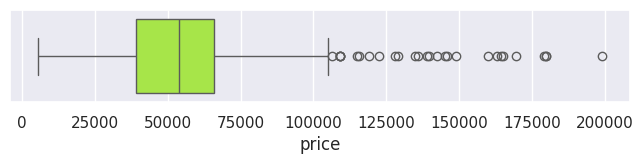

In [541]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_subset['price'], color="greenyellow")

<Axes: xlabel='mileage'>

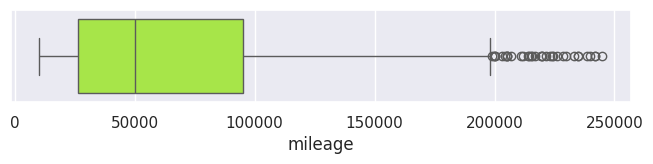

In [542]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_subset['mileage'], color="greenyellow")

#### Histogram (Price)

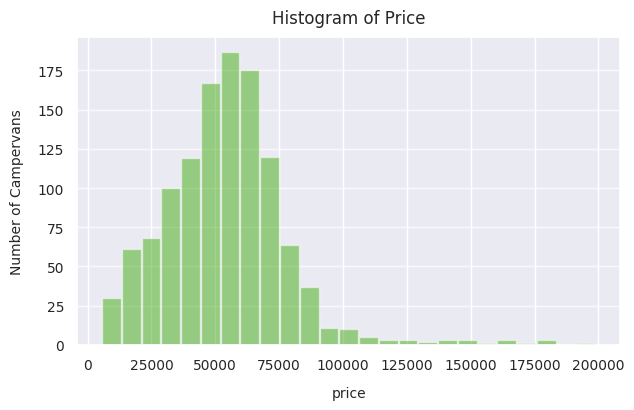

In [543]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df_subset['price'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price', fontsize=10, labelpad=10)
plt.ylabel('Number of Campervans', fontsize=10, labelpad=10)
plt.title('Histogram of Price', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

#### Histogram Mean Price by Canton

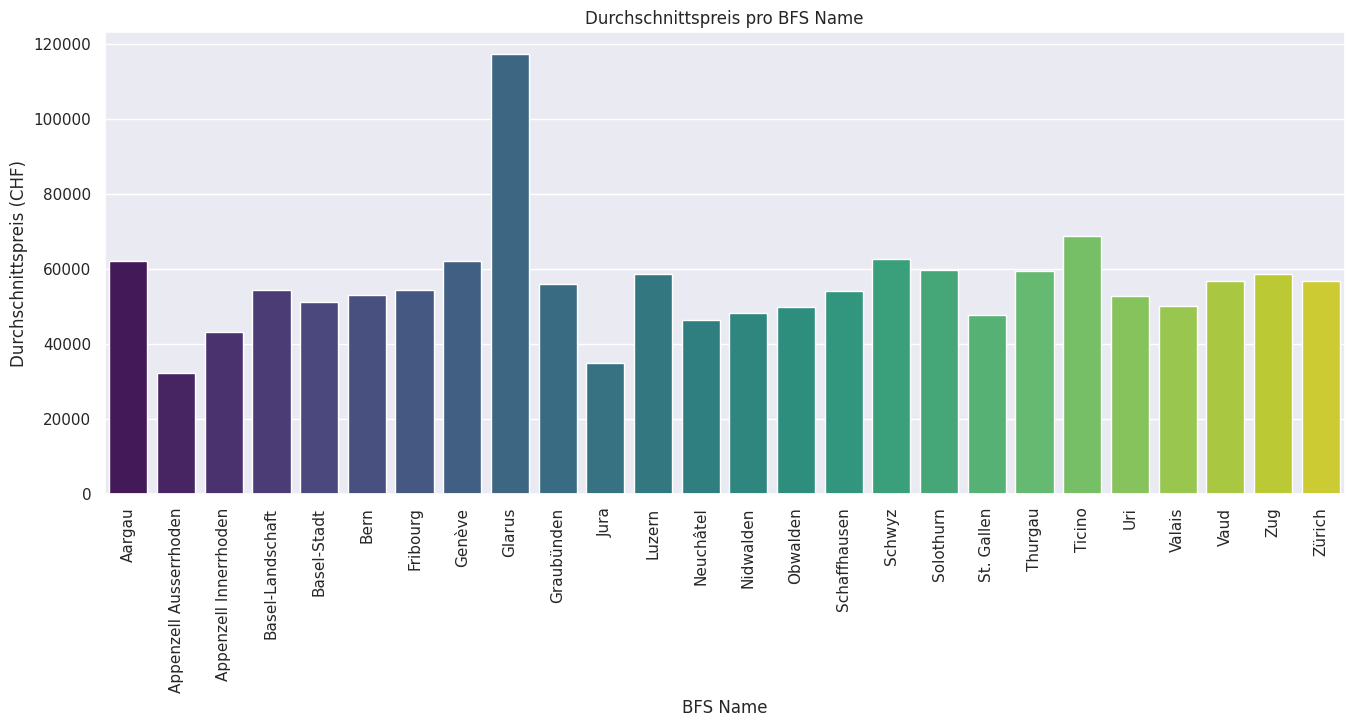

In [544]:

# Berechne den Durchschnittspreis pro bfs_name
mean_prices = df.groupby('bfs_name')['price'].mean().reset_index()

# Erstelle das Balkendiagramm
plt.figure(figsize=(16, 6))
sns.barplot(x='bfs_name', y='price', data=mean_prices, palette='viridis')

# Diagramm beschriften
plt.title('Durchschnittspreis pro BFS Name')
plt.xlabel('BFS Name')
plt.ylabel('Durchschnittspreis (CHF)')
plt.xticks(rotation=90)
plt.show()

#### Barchart of Number of Campervans per Price Category

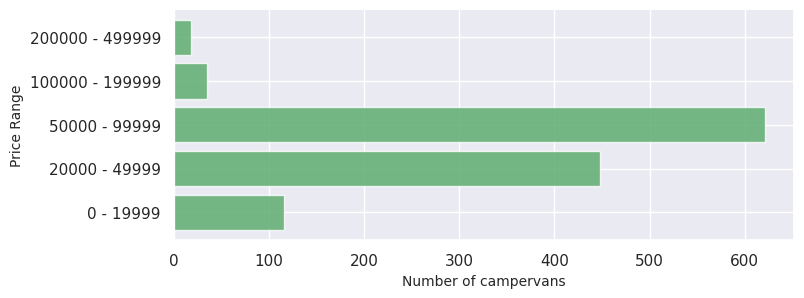

In [554]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['price_cat'].value_counts().nlargest(15).sort_index()

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of campervans', fontsize=10)
ax.set_ylabel('Price Range', fontsize=10)

# Show graph
plt.show()

#### Barchart Number of Campervans per Mileage Category

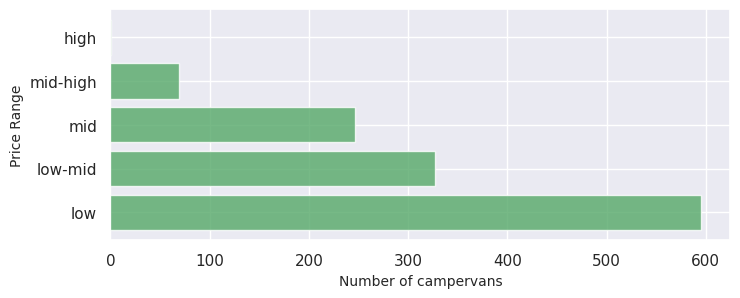

In [555]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['mileage_cat'].value_counts().nlargest(15).sort_index()

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of campervans', fontsize=10)
ax.set_ylabel('Price Range', fontsize=10)

# Show graph
plt.show()

#### Barchart Number of Campervans per Canton

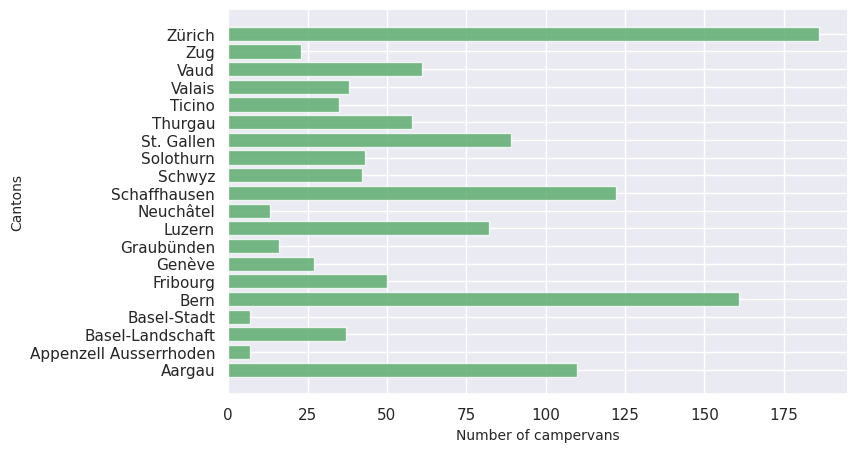

In [545]:
# Group data by Cantons 
df_bar = df['bfs_name'].value_counts().nlargest(20).sort_index()

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of campervans', fontsize=10)
ax.set_ylabel('Cantons', fontsize=10)

# Show graph
plt.show()

#### Histogram (Mileage)

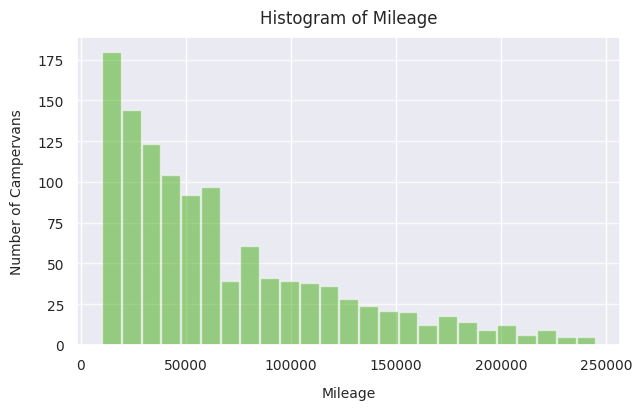

In [546]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df_subset['mileage'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Mileage', fontsize=10, labelpad=10)
plt.ylabel('Number of Campervans', fontsize=10, labelpad=10)
plt.title('Histogram of Mileage', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

#### Density Map

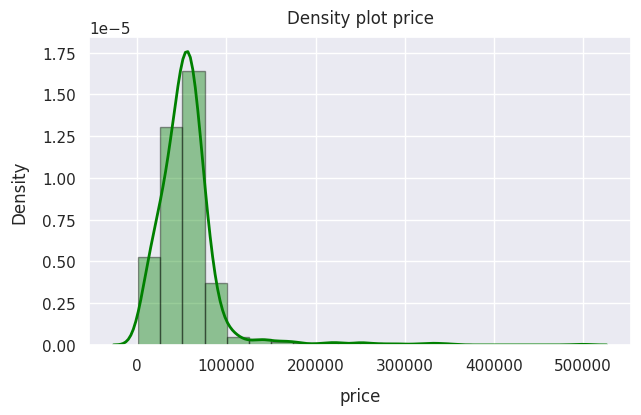

In [547]:
plt.figure(figsize=(7,4))
sns.distplot(df['price'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price', fontsize=12, pad=10)
plt.xlabel('price', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

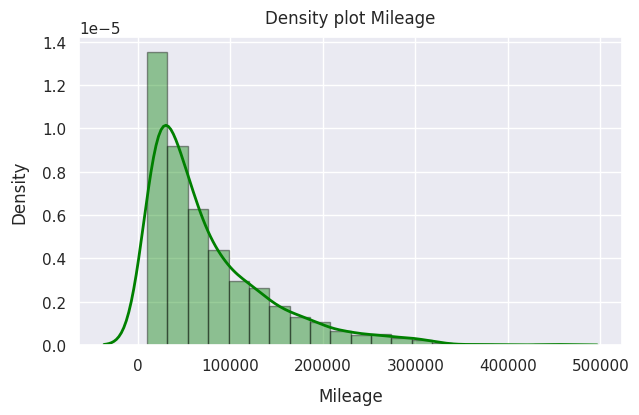

In [548]:
plt.figure(figsize=(7,4))
sns.distplot(df['mileage'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot Mileage', fontsize=12, pad=10)
plt.xlabel('Mileage', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

#### Quantile-quantile Plot

       price        var
674      900  -1.452634
684     2800  -1.402687
183     2990  -1.397692
669     3500  -1.384285
37      3500  -1.384285
...      ...        ...
256   324999   7.067269
142   332000   7.251311
212   339000   7.435327
1188  349990   7.724232
939   499000  11.641401

[1238 rows x 2 columns]


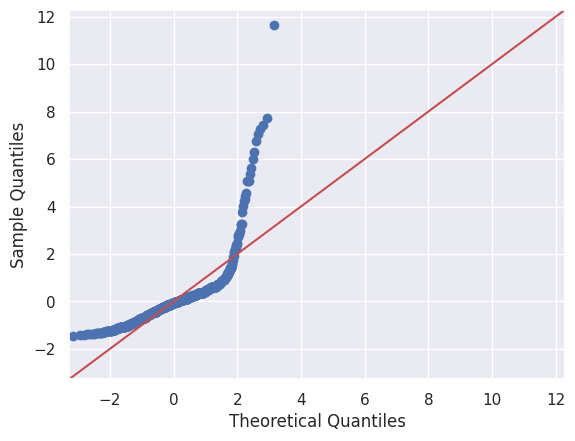

In [549]:
# Variable (standardized)
x = 'price'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['price', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

#### Piechart Number of Campervans per Canton

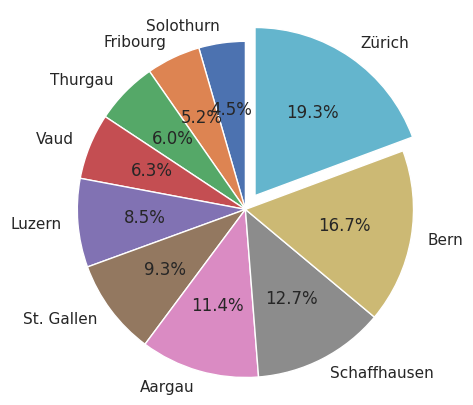

In [550]:
# Group data by bfs_name
df_bar = df.bfs_name.value_counts().nlargest(10).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = [0] * len(sizes)  # create a list of zeros with the same length as sizes
explode[-1] = 0.1  # increase the distance of the last piece

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

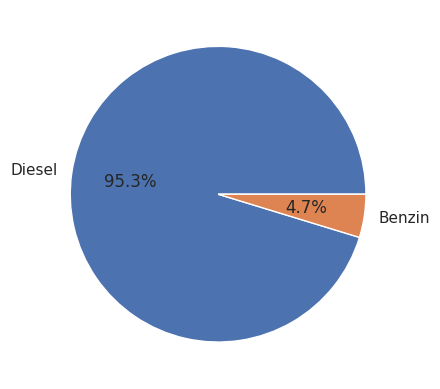

In [551]:
# get a pie chart for the fuel types
fig, ax = plt.subplots()
ax.pie(count, labels=count.index, autopct='%1.1f%%')
plt.show()

### Multivariate graphical EDA

## Plot Histogram of Prices

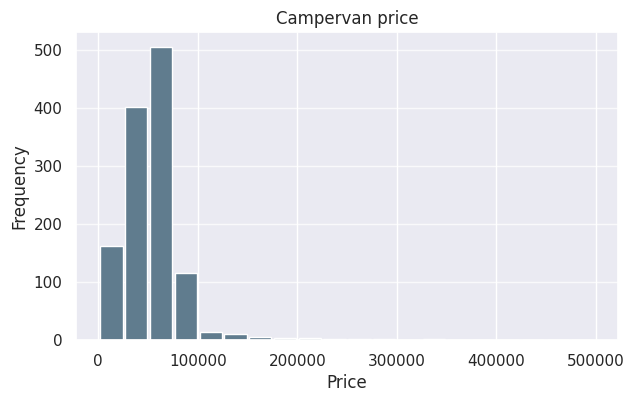

In [552]:
# Create a histogram
plt.figure(figsize=(7,4))
df.price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Campervan price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

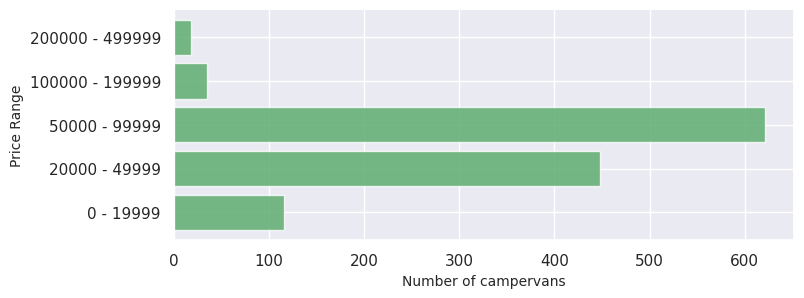

In [553]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['price_cat'].value_counts().nlargest(15).sort_index()

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of campervans', fontsize=10)
ax.set_ylabel('Price Range', fontsize=10)

# Show graph
plt.show()